In [179]:
from sklearn.metrics import mean_squared_error, r2_score #thư viện dùng để đánh giá giữa dữ liệu thực tế và dữ liệu dự đoánD
from sklearn.model_selection import train_test_split #thư viện để chia bộ dữ liệu thành train và test
from sklearn.linear_model import LinearRegression #thư viện để khởi tạo mô hình hồi quy tuyến tính
from sklearn.preprocessing import StandardScaler # data normalization
from termcolor import colored as cl # text customization
from sklearn.cluster import KMeans # K-means algorithm
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from sklearn import linear_model
import matplotlib.pyplot as plt
#import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [180]:
data = pd.read_excel("Financial Sample xuly (2).xlsx")
data.sample(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
603,Channel Partners,Mexico,Velo,High,410.0,120.0,12.0,4920.0,639.60,4280.40,1230.0,3050.40,2014-10-01,10,October,2014
333,Small Business,France,Paseo,Medium,448.0,10.0,300.0,134400.0,9408.00,124992.00,112000.0,12992.00,2014-06-01,6,June,2014
562,Government,Canada,VTT,High,NaN,250.0,350.0,218050.0,26166.00,191884.00,161980.0,29904.00,2013-09-01,9,September,2013
691,Midmarket,Germany,VTT,High,1175.0,250.0,15.0,17625.0,2643.75,14981.25,11750.0,3231.25,2014-10-01,10,October,2014
394,Government,Canada,Amarilla,Medium,708.0,260.0,20.0,14160.0,1132.80,13027.20,7080.0,5947.20,2014-06-01,6,June,2014
217,Channel Partners,Canada,Paseo,Medium,2431.0,10.0,12.0,29172.0,1458.60,27713.40,7293.0,20420.40,2014-12-01,12,December,2014
625,Small Business,Mexico,Carretera,High,801.0,3.0,300.0,240300.0,33642.00,206658.00,200250.0,6408.00,2014-07-01,7,July,2014
143,Small Business,Canada,Amarilla,Low,1916.0,260.0,300.0,574800.0,11496.00,563304.00,479000.0,84304.00,2014-12-01,12,December,2014
438,Midmarket,Germany,Amarilla,Medium,970.0,260.0,15.0,14550.0,1309.50,13240.50,9700.0,3540.50,2013-11-01,11,November,2013
99,Channel Partners,Canada,Carretera,Low,1295.0,3.0,12.0,15540.0,310.80,15229.20,3885.0,11344.20,2014-10-01,10,October,2014


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        698 non-null    object        
 4   Units Sold           689 non-null    float64       
 5   Manufacturing Price  676 non-null    float64       
 6   Sale Price           685 non-null    float64       
 7   Gross Sales          667 non-null    float64       
 8   Discounts            697 non-null    float64       
 9    Sales               689 non-null    float64       
 10  COGS                 684 non-null    float64       
 11  Profit               683 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [182]:
data.describe().round(2)

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,689.00,676.00,685.00,667.00,697.00,689.00,684.00,683.00,700.00,700.00
mean,1605.75,96.26,118.76,180446.54,13137.71,168464.04,144919.70,23835.10,7.90,2013.75
std,868.50,108.70,137.15,252109.04,23000.33,235628.29,203118.44,42267.42,3.38,0.43
min,200.00,3.00,7.00,1799.00,0.00,1655.08,918.00,-40617.50,1.00,2013.00
25%,905.00,5.00,12.00,17494.50,801.00,15620.85,7468.75,2770.98,5.75,2013.75
50%,1535.00,10.00,20.00,37515.00,2574.00,35172.00,22506.25,9200.64,9.00,2014.00
75%,2227.50,250.00,300.00,272450.00,15400.00,260580.00,242137.50,22546.26,10.25,2014.00
max,4492.50,260.00,350.00,1207500.00,149677.50,1159200.00,950625.00,262200.00,12.00,2014.00


In [183]:
data.isnull().sum()

Segment                 0
Country                 0
Product                 0
Discount Band           2
Units Sold             11
Manufacturing Price    24
Sale Price             15
Gross Sales            33
Discounts               3
 Sales                 11
COGS                   16
Profit                 17
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

In [184]:
final_data = data.dropna()

In [185]:
final_data.corr()

C:\Users\thebao\AppData\Local\Temp\ipykernel_13076\4285913857.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_data.corr()


,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
Units Sold,1.000000,-0.030975,-0.079503,0.315099,0.266299,0.313848,0.318674,0.211969,-0.115119,0.063774
Manufacturing Price,-0.030975,1.000000,0.032778,0.010688,0.014052,0.010129,0.008922,0.013835,0.006231,0.015737
Sale Price,-0.079503,0.032778,1.000000,0.802851,0.652256,0.802364,0.794130,0.647444,0.009555,0.013540
Gross Sales,0.315099,0.010688,0.802851,1.000000,0.823122,0.998293,0.994672,0.771568,-0.029274,0.053436
Discounts,0.266299,0.014052,0.652256,0.823122,1.000000,0.788554,0.819835,0.434302,-0.047251,0.020200
Sales,0.313848,0.010129,0.802364,0.998293,0.788554,1.000000,0.992861,0.790901,-0.026843,0.055791
COGS,0.318674,0.008922,0.794130,0.994672,0.819835,0.992861,1.000000,0.712264,-0.029383,0.056218
Profit,0.211969,0.013835,0.647444,0.771568,0.434302,0.790901,0.712264,1.000000,-0.007214,0.039891
Month Number,-0.115119,0.006231,0.009555,-0.029274,-0.047251,-0.026843,-0.029383,-0.007214,1.000000,-0.427380
Year,0.063774,0.015737,0.013540,0.053436,0.020200,0.055791,0.056218,0.039891,-0.427380,1.000000


In [186]:
final_data.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

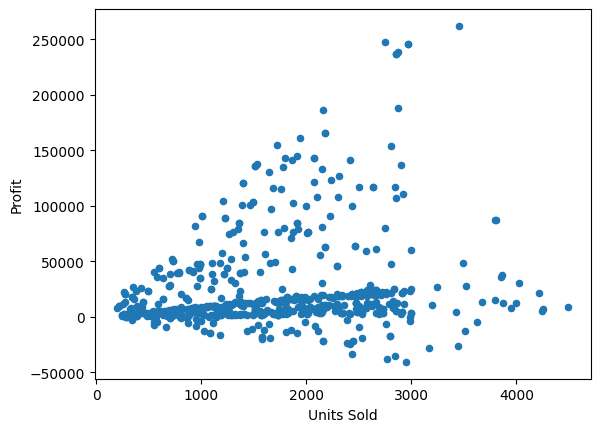

In [187]:
data.plot(kind='scatter', x='Units Sold', y='Profit')
plt.show()

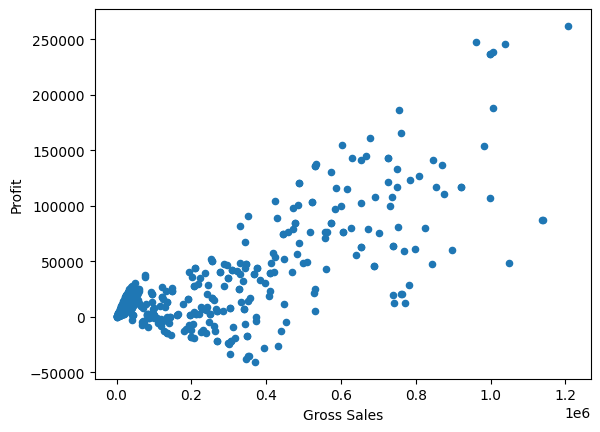

In [188]:
data.plot(kind='scatter', x='Gross Sales', y='Profit')
plt.show()

In [189]:
data_phancum = final_data.copy()
features = ['Segment', 'Country', 'Product',
            'Discount Band', 'Date', 'Month Name']
data_phancum = data_phancum.drop(columns=features, axis=1)
#data_phancum
sc = StandardScaler()
data_stand = sc.fit_transform(data_phancum)
data_stand

array([[ 0.01426918, -0.86502506, -0.72011744, ..., -0.16297548,
        -2.04499087,  0.57603661],
       [-0.32404413, -0.86502506, -0.72011744, ..., -0.23849827,
        -2.04499087,  0.57603661],
       [ 0.65052564, -0.86502506, -0.75675477, ..., -0.29739336,
        -0.55781707,  0.57603661],
       ...,
       [-1.20536452,  1.49105083,  1.33157329, ..., -0.50454159,
         0.63192198,  0.57603661],
       [-0.27059631, -0.84668984, -0.81537451, ..., -0.54085346,
        -1.74755611,  0.57603661],
       [ 0.22749186,  1.39937472, -0.77873717, ..., -0.24374806,
        -0.85525183,  0.57603661]])

In [190]:
data_stand = pd.DataFrame(data_stand, columns=['Units Sold', 'Manufacturing Price', 'Sale Price',
                                               'Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit', 'Month Number', 'Year'])
data_stand

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
0,0.014269,-0.865025,-0.720117,-0.589688,-0.577528,-0.579206,-0.632593,-0.162975,-2.044991,0.576037
1,-0.324044,-0.865025,-0.720117,-0.613390,-0.577528,-0.604873,-0.647314,-0.238498,-2.044991,0.576037
2,0.650526,-0.865025,-0.756755,-0.588493,-0.577528,-0.577912,-0.604909,-0.297393,-0.557817,0.576037
3,0.982584,-0.865025,-0.756755,-0.571046,-0.577528,-0.559017,-0.590461,-0.260330,-0.557817,0.576037
4,-0.105704,-0.865025,1.697947,1.390794,-0.577528,1.565546,1.233785,2.882941,1.226791,0.576037
...,...,...,...,...,...,...,...,...,...,...
581,-1.493073,1.399375,-0.720117,-0.695289,-0.540657,-0.697357,-0.698180,-0.521779,1.226791,0.576037
582,0.988270,1.491051,1.331573,2.239065,4.094262,2.003724,2.348926,-0.259695,-1.450121,0.576037
583,-1.205365,1.491051,1.331573,-0.066146,0.453097,-0.118229,-0.037269,-0.504542,0.631922,0.576037
584,-0.270596,-0.846690,-0.815375,-0.680486,-0.517276,-0.683732,-0.678833,-0.540853,-1.747556,0.576037


In [191]:
# elbow
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k, n_init='auto')
    km = km.fit(data_stand)
    Sum_of_squared_distances.append(km.inertia_)

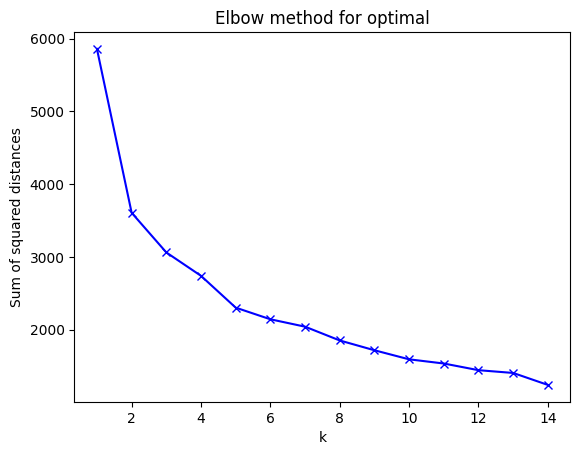

In [192]:
#plotting
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal')
plt.show()

In [193]:
#select n_cluster = 4 or 3
kmeans = KMeans(n_clusters=4, n_init="auto")
kmeans.fit(data_phancum[['Gross Sales', 'Profit']])

KMeans(n_clusters=4, n_init='auto')

In [194]:
data_phancum['kmeans_4'] = kmeans.labels_
data_phancum

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year,kmeans_4
0,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,1,2014,0
1,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,1,2014,0
2,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,6,2014,0
4,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,6,2014,0
5,1513.0,3.0,350.0,529550.0,0.0,529550.0,393380.0,136170.0,12,2014,2
...,...,...,...,...,...,...,...,...,...,...,...
694,293.0,250.0,20.0,5860.0,879.0,4981.0,2930.0,2051.0,12,2014,0
695,2475.0,260.0,300.0,742500.0,111375.0,631125.0,618750.0,12375.0,3,2014,2
696,546.0,260.0,300.0,163800.0,24570.0,139230.0,136500.0,2730.0,10,2014,0
697,1368.0,5.0,7.0,9576.0,1436.4,8139.6,6840.0,1299.6,2,2014,0


In [195]:
data_phancum.groupby('kmeans_4').size()

kmeans_4
0    391
1    114
2     61
3     20
dtype: int64

In [196]:
data_phancum.groupby('kmeans_4').describe()

Units Sold                                                    \
              count         mean         std     min      25%     50%   
kmeans_4                                                                
0             391.0  1500.801790  908.917524   214.0   685.50  1369.5   
1             114.0  1522.723684  753.347826   552.0   958.25  1295.0   
2              61.0  1994.983607  472.018255  1351.5  1679.00  1922.0   
3              20.0  2949.500000  397.579618  2313.0  2792.00  2864.0   

                           Manufacturing Price              ... Month Number  \
               75%     max               count        mean  ...          75%   
kmeans_4                                                    ...                
0         2172.500  4492.5               391.0   98.217391  ...        10.00   
1         2003.625  3627.0               114.0   89.000000  ...        11.00   
2         2240.000  4219.5                61.0  111.081967  ...        11.00   
3         2972.750  3802.5                20.0   86.300000  ...         9.25   

                 Year                                                         \
           max  count         mean       std     min     25%     50%     75%   
kmeans_4                                                                       
0         12.0  391.0  2013.728900  0.445097  2013.0  2013.0  2014.0  2014.0   
1         12.0  114.0  2013.789474  0.409482  2013.0  2014.0  2014.0  2014.0   
2         12.0   61.0  2013.754098  0.434194  2013.0  2014.0  2014.0  2014.0   
3         12.0   20.0  2013.950000  0.223607  2013.0  2014.0  2014.0  2014.0   

                  
             max  
kmeans_4          
0         2014.0  
1         2014.0  
2         2014.0  
3         2014.0  

[4 rows x 80 columns]

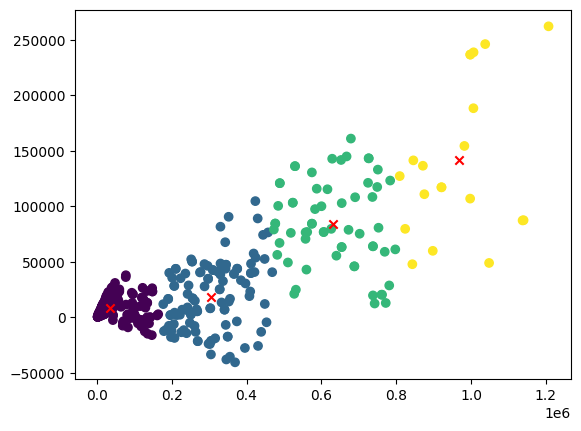

In [197]:
plt.scatter(x=data_phancum['Gross Sales'], y=data_phancum['Profit'], c=data_phancum['kmeans_4'])
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red')
plt.show()

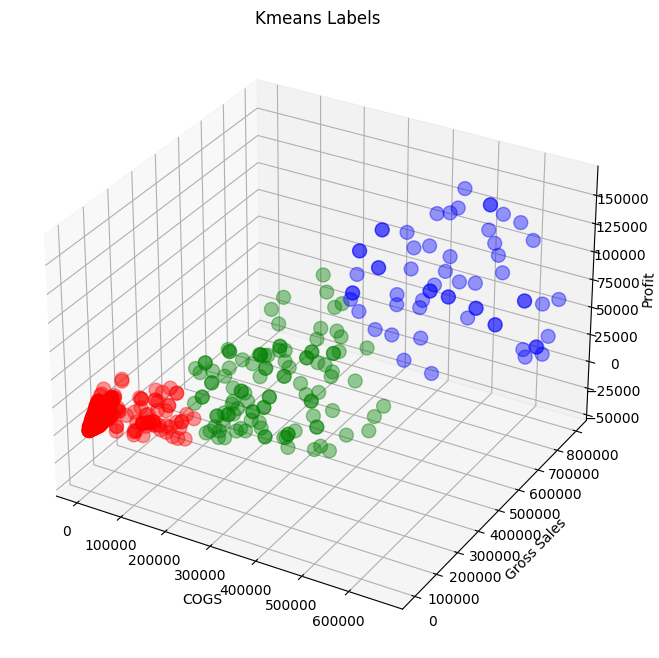

In [199]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_xlabel("COGS")
ax.set_ylabel("Gross Sales")
ax.set_zlabel("Profit")
ax.set_title("Kmeans Labels")

colors = ['r', 'g', 'b']

for i, c in enumerate(colors):
    clustered_data = data_phancum[data_phancum['kmeans_4'] == i]
    ax.scatter(clustered_data['COGS'], clustered_data['Gross Sales'], clustered_data['Profit'], c=c, s=100, alpha=0.4)

plt.show()